# Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [ ]:
#Import libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('Company_data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
df.duplicated().sum()

0

In [8]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=['ShelveLoc','Urban', 'US'])
sales1=encoder.fit_transform(df)
sales1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,1,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,3,59,12,1,1
3,7.40,117,100,4,466,97,3,55,14,1,1
4,4.15,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,3,55,11,2,1
397,7.41,162,26,12,368,159,3,40,18,1,1
398,5.94,100,79,7,284,95,1,50,12,1,1


In [ ]:
#Approach 1
# now converting sales data into categorical column,considering sales cutoff at 7.49 to conver sales data into high and low
#approach 2
#we can also use binning concept

#we are using approach 1

In [10]:
sales_val = []
for value in df["Sales"]:
    if value<=7.49:
        sales_val.append("low")
    else:
        sales_val.append("high")
        
sales1["sales_val"]= sales_val

In [11]:
sales_val

['high',
 'high',
 'high',
 'low',
 'low',
 'high',
 'low',
 'high',
 'low',
 'low',
 'high',
 'high',
 'low',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'high',
 'low',
 'high',
 'low',
 'low',
 'high',
 'high',
 'high',
 'low',
 'low',
 'high',
 'high',
 'high',
 'low',
 'high',
 'low',
 'high',
 'high',
 'low',
 'low',
 'low',
 'low',
 'high',
 'high',
 'low',
 'low',
 'low',
 'high',
 'low',
 'low',
 'high',
 'low',
 'low',
 'high',
 'low',
 'low',
 'low',
 'high',
 'low',
 'low',
 'low',
 'high',
 'low',
 'low',
 'high',
 'high',
 'low',
 'high',
 'high',
 'high',
 'high',
 'high',
 'low',
 'low',
 'high',
 'low',
 'high',
 'high',
 'high',
 'low',
 'high',
 'high',
 'high',
 'high',
 'low',
 'low',
 'high',
 'high',
 'high',
 'low',
 'high',
 'low',
 'low',
 'low',
 'high',
 'high',
 'low',
 'high',
 'low',
 'high',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'low',
 'high',
 'low',
 'high',
 'high',
 'low',
 'low',
 'low',
 'high',
 'high',
 'low',
 'hig

In [12]:
x=sales1.drop(['sales_val','Sales'],axis=1)
y=sales1['sales_val']

In [13]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,3,55,11,2,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


In [14]:
#no need to do the standardization

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

# DT using Entrophy

In [17]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(x_train,y_train)
ypred = model.predict(x_test)
ypred

array(['low', 'low', 'low', 'high', 'low', 'high', 'high', 'high', 'high',
       'high', 'low', 'high', 'low', 'high', 'high', 'low', 'high', 'low',
       'low', 'low', 'high', 'high', 'high', 'high', 'low', 'high',
       'high', 'low', 'low', 'high', 'high', 'low', 'high', 'high', 'low',
       'high', 'low', 'low', 'high', 'high', 'low', 'low', 'low', 'high',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'high',
       'high', 'low', 'low', 'low', 'high', 'high', 'low', 'low', 'low',
       'high', 'high', 'low', 'high', 'high', 'low', 'low', 'high',
       'high', 'low', 'low', 'high', 'low', 'high', 'low', 'low', 'high',
       'low', 'high', 'low', 'low', 'high', 'high', 'high', 'high', 'low',
       'low', 'high', 'low', 'low', 'high', 'low', 'high', 'low', 'low',
       'high', 'low', 'low', 'high', 'high', 'high', 'high', 'low', 'low',
       'low', 'high', 'low', 'low', 'low', 'low', 'high', 'low', 'low',
       'low', 'low', 'high', 'high', 'high'], dtype=

In [20]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

        high       0.62      0.65      0.64        52
         low       0.72      0.69      0.71        68

    accuracy                           0.68       120
   macro avg       0.67      0.67      0.67       120
weighted avg       0.68      0.68      0.68       120



In [21]:
print('Training accuracy: ',model.score(x_train,y_train))
print('Testing Accuracy: ', model.score(x_test,y_test))

Training accuracy:  0.8821428571428571
Testing Accuracy:  0.675


In [23]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

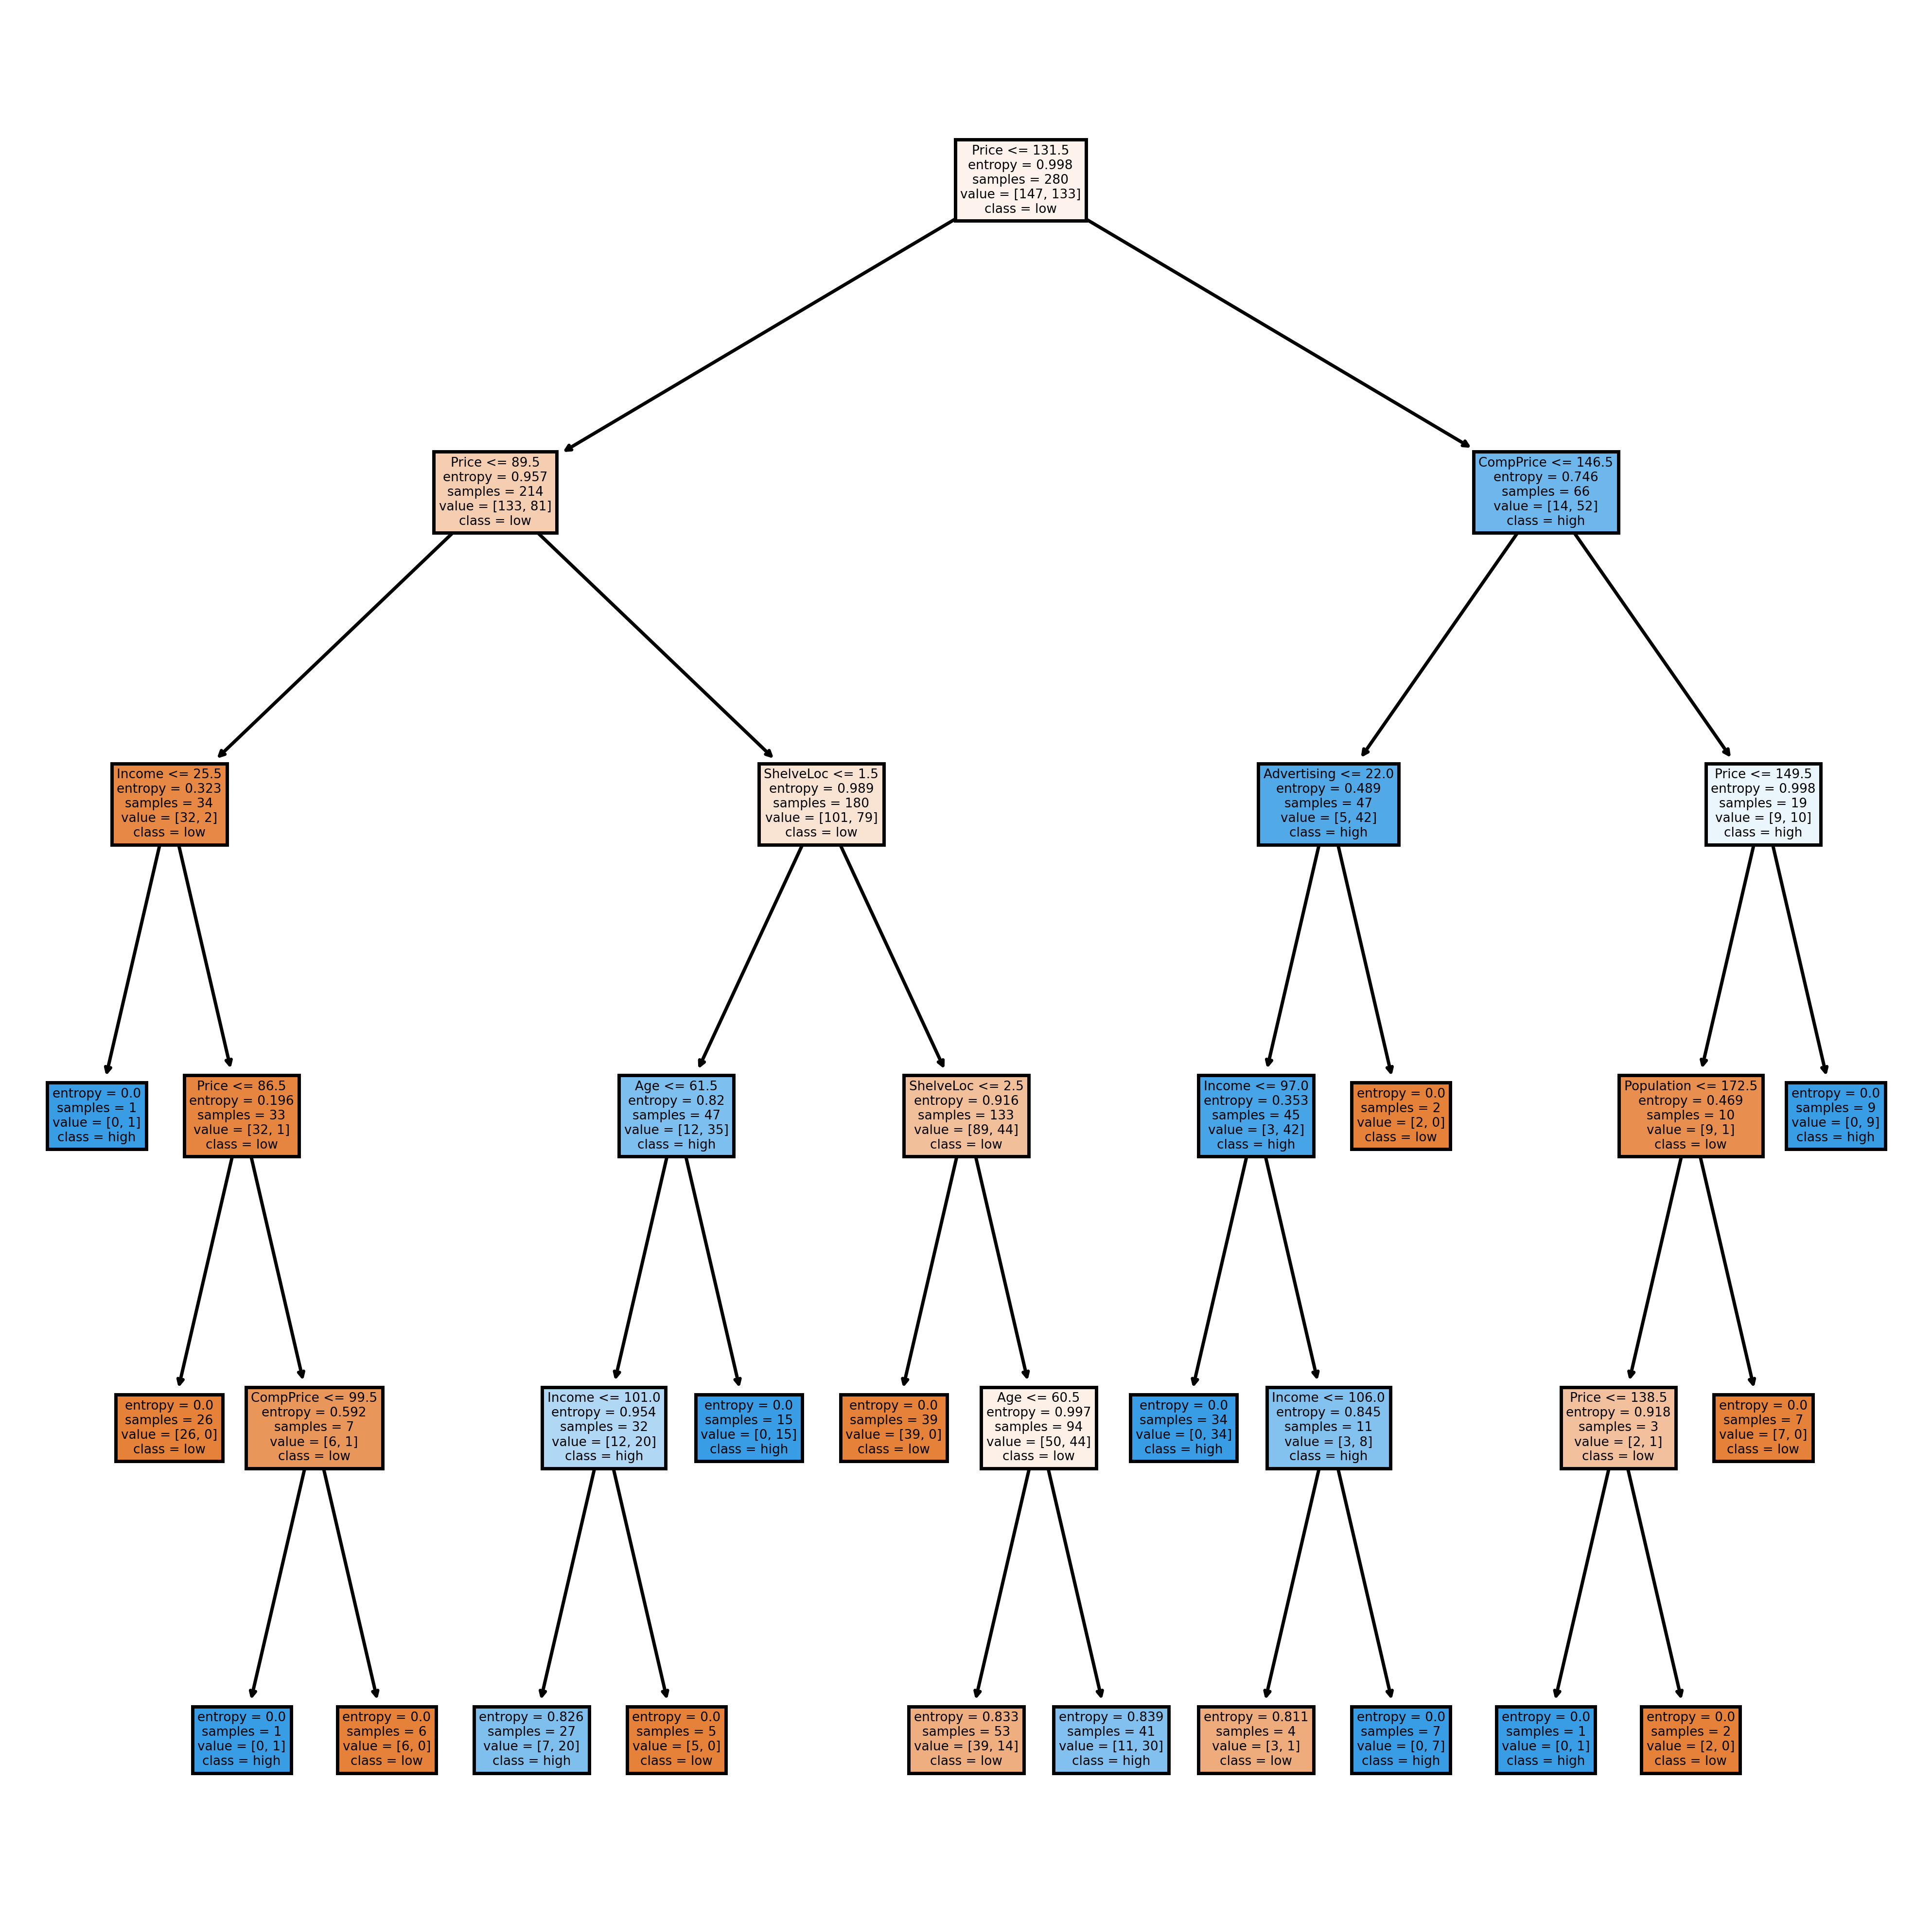

In [24]:
tree.plot_tree(model, feature_names=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
              class_names=['low', 'high'],
              filled=True)
plt.show()

In [29]:
model.feature_importances_

array([0.06501911, 0.14488567, 0.04034794, 0.01103153, 0.34553781,
       0.26116007, 0.13201788, 0.        , 0.        , 0.        ])

# DT using Gini

In [25]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=5)
model_gini.fit(x_train,y_train)
ypreds = model.predict(x_test)
ypreds

array(['low', 'low', 'low', 'high', 'low', 'high', 'high', 'high', 'high',
       'high', 'low', 'high', 'low', 'high', 'high', 'low', 'high', 'low',
       'low', 'low', 'high', 'high', 'high', 'high', 'low', 'high',
       'high', 'low', 'low', 'high', 'high', 'low', 'high', 'high', 'low',
       'high', 'low', 'low', 'high', 'high', 'low', 'low', 'low', 'high',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'high',
       'high', 'low', 'low', 'low', 'high', 'high', 'low', 'low', 'low',
       'high', 'high', 'low', 'high', 'high', 'low', 'low', 'high',
       'high', 'low', 'low', 'high', 'low', 'high', 'low', 'low', 'high',
       'low', 'high', 'low', 'low', 'high', 'high', 'high', 'high', 'low',
       'low', 'high', 'low', 'low', 'high', 'low', 'high', 'low', 'low',
       'high', 'low', 'low', 'high', 'high', 'high', 'high', 'low', 'low',
       'low', 'high', 'low', 'low', 'low', 'low', 'high', 'low', 'low',
       'low', 'low', 'high', 'high', 'high'], dtype=

In [26]:
print(classification_report(y_test,ypreds))

              precision    recall  f1-score   support

        high       0.62      0.65      0.64        52
         low       0.72      0.69      0.71        68

    accuracy                           0.68       120
   macro avg       0.67      0.67      0.67       120
weighted avg       0.68      0.68      0.68       120



In [27]:
print('Training accuracy: ',model_gini.score(x_train,y_train))
print('Testing Accuracy: ', model_gini.score(x_test,y_test))

Training accuracy:  0.8857142857142857
Testing Accuracy:  0.6583333333333333


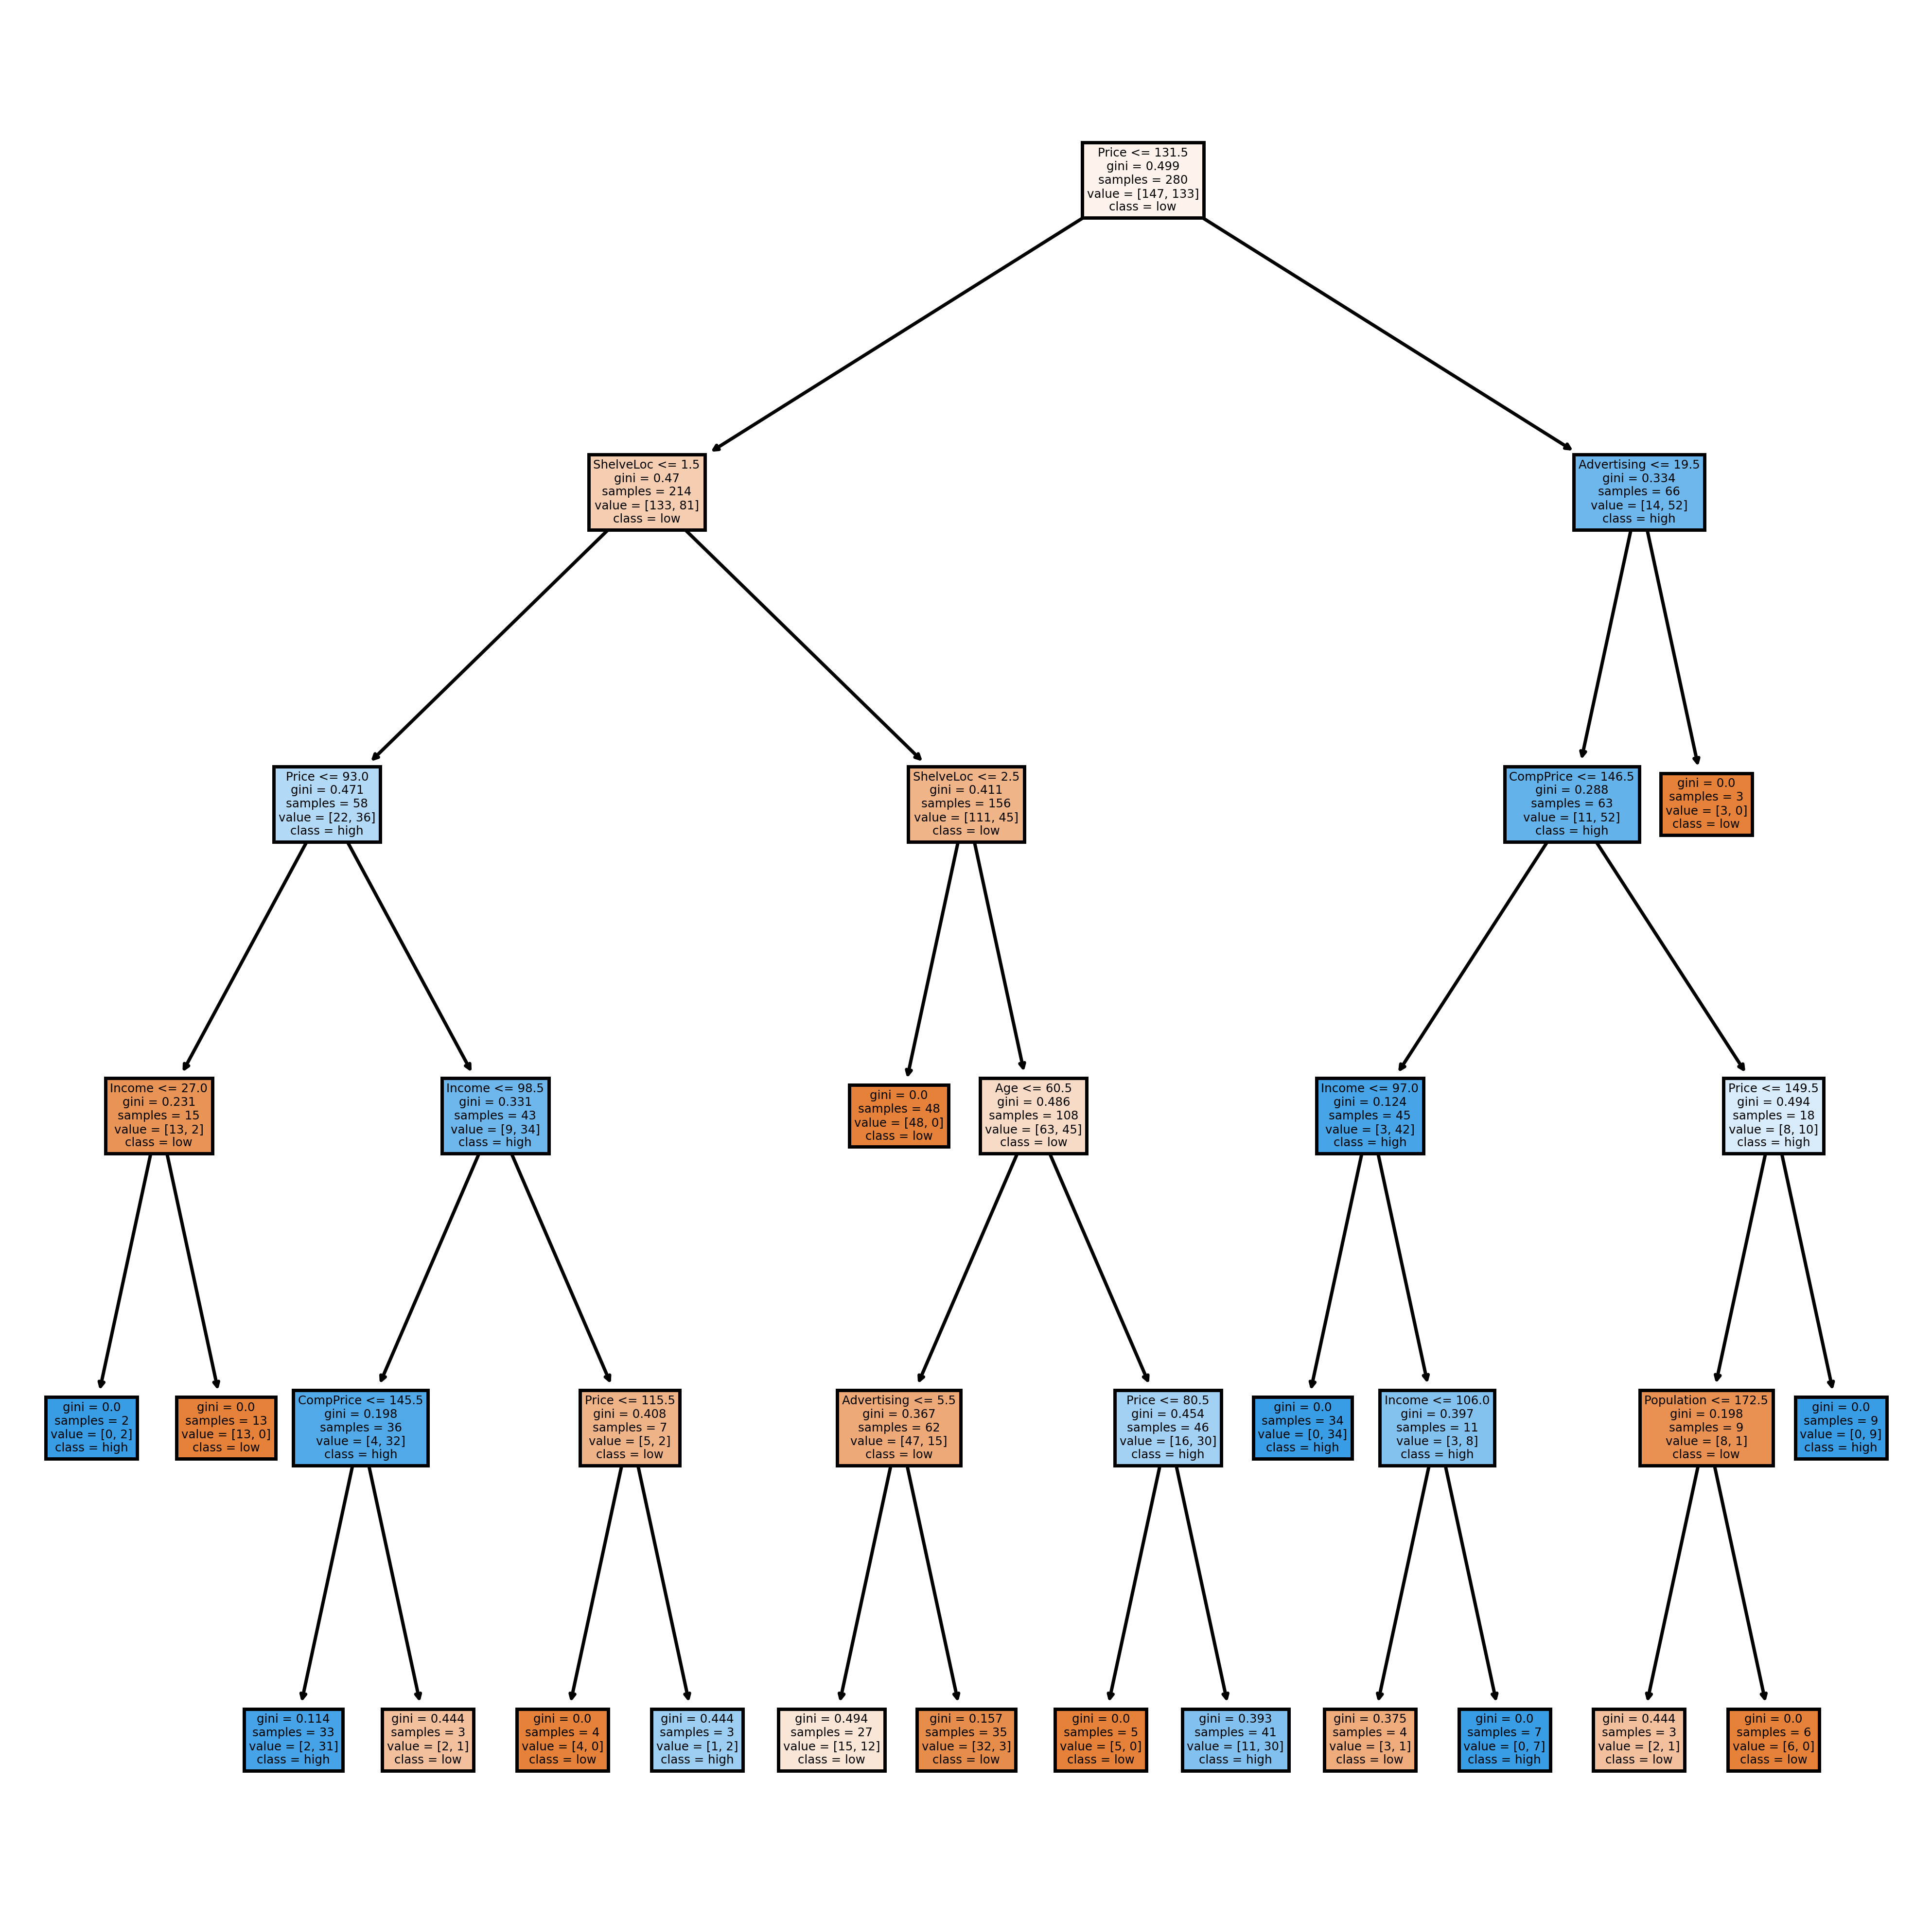

In [28]:
tree.plot_tree(model_gini, feature_names=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
              class_names=['low', 'high'],
              filled=True)
plt.show()

In [30]:
model_gini.feature_importances_

array([0.0595967 , 0.12391589, 0.08195545, 0.00465505, 0.41817078,
       0.21860927, 0.09309687, 0.        , 0.        , 0.        ])